In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']  = (12, 6)
plt.rcParams['axes.labelsize']  = 12
plt.rcParams['axes.titlesize']  = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['lines.linewidth'] = 1

plt.ion()

In [10]:
path = "./benchmarks/results/output.csv"
df = pd.read_csv(path)

df

,instance,satisfiability,solver,result,time
0,block0.cnf,sat,my-implementation,sat,1.280090e-01
1,cnfgen-php-10-10.cnf,sat,my-implementation,sat,2.615313e+01
2,elimredundant.cnf,sat,my-implementation,sat,2.619500e-01
3,prime121.cnf,sat,my-implementation,sat,2.244787e+03
4,prime1369.cnf,sat,my-implementation,sat,1.191201e+06
...,...,...,...,...,...
93,uuf100-0147.cnf,unsat,minisat,unsat,4.938000e+00
94,uuf100-0151.cnf,unsat,minisat,unsat,4.983000e+00
95,uuf100-0161.cnf,unsat,minisat,unsat,2.173000e+00
96,uuf100-0175.cnf,unsat,minisat,unsat,8.068000e+00


In [11]:
df["time_sec"] = df["time"] * 0.001
df["time_min"] = df["time_sec"] / 60

df

,instance,satisfiability,solver,result,time,time_sec,time_min
0,block0.cnf,sat,my-implementation,sat,1.280090e-01,0.000128,0.000002
1,cnfgen-php-10-10.cnf,sat,my-implementation,sat,2.615313e+01,0.026153,0.000436
2,elimredundant.cnf,sat,my-implementation,sat,2.619500e-01,0.000262,0.000004
3,prime121.cnf,sat,my-implementation,sat,2.244787e+03,2.244787,0.037413
4,prime1369.cnf,sat,my-implementation,sat,1.191201e+06,1191.200700,19.853345
...,...,...,...,...,...,...,...
93,uuf100-0147.cnf,unsat,minisat,unsat,4.938000e+00,0.004938,0.000082
94,uuf100-0151.cnf,unsat,minisat,unsat,4.983000e+00,0.004983,0.000083
95,uuf100-0161.cnf,unsat,minisat,unsat,2.173000e+00,0.002173,0.000036
96,uuf100-0175.cnf,unsat,minisat,unsat,8.068000e+00,0.008068,0.000134


In [12]:
len(df)

98

In [15]:
df[df.isnull().any(axis=1)]

,instance,satisfiability,solver,result,time,time_sec,time_min
7,prime1849.cnf,sat,my-implementation,NaN,NaN,NaN,NaN
53,cnfgen-ram-4-3-10.cnf,unsat,my-implementation,NaN,NaN,NaN,NaN


In [35]:
filtered_df = df.dropna()
# remove from MiniSat
filtered_df = filtered_df[filtered_df.instance != "prime1849.cnf"]
filtered_df = filtered_df[filtered_df.instance != "cnfgen-ram-4-3-10.cnf"]
len(filtered_df)

94

In [18]:
filtered_df.head()

,instance,satisfiability,solver,result,time,time_sec,time_min
0,block0.cnf,sat,my-implementation,sat,1.280090e-01,0.000128,0.000002
1,cnfgen-php-10-10.cnf,sat,my-implementation,sat,2.615313e+01,0.026153,0.000436
2,elimredundant.cnf,sat,my-implementation,sat,2.619500e-01,0.000262,0.000004
3,prime121.cnf,sat,my-implementation,sat,2.244787e+03,2.244787,0.037413
4,prime1369.cnf,sat,my-implementation,sat,1.191201e+06,1191.200700,19.853345


In [36]:
filtered_df[filtered_df['satisfiability'] != filtered_df['result']]

,instance,satisfiability,solver,result,time,time_sec,time_min


In [51]:
sat_df = filtered_df[filtered_df["satisfiability"] == "sat"]

frames = []
for a in sat_df["solver"].unique():
  time = sat_df.loc[sat_df["solver"] == a, "time_sec"]
  t = pd.DataFrame({'time' : sorted(time)})
  t['n_solved'] = list(range(1,1+len(t)))
  t['solver'] = a
  frames.append(t)

sat_data = pd.concat(frames, ignore_index=True)
print(sat_data)

           time  n_solved             solver
0      0.000128         1  my-implementation
1      0.000255         2  my-implementation
2      0.000262         3  my-implementation
3      0.000308         4  my-implementation
4      0.002689         5  my-implementation
5      0.002767         6  my-implementation
6      0.003648         7  my-implementation
7      0.003764         8  my-implementation
8      0.003941         9  my-implementation
9      0.004714        10  my-implementation
10     0.004952        11  my-implementation
11     0.011064        12  my-implementation
12     0.026153        13  my-implementation
13     0.146235        14  my-implementation
14     0.215661        15  my-implementation
15     0.816613        16  my-implementation
16     0.883502        17  my-implementation
17     2.244787        18  my-implementation
18    14.755034        19  my-implementation
19    37.016325        20  my-implementation
20   283.453635        21  my-implementation
21  1035.8

In [52]:
unsat_df = filtered_df[filtered_df["satisfiability"] == "unsat"]

frames = []
for a in unsat_df["solver"].unique():
  time = unsat_df.loc[unsat_df["solver"] == a, "time_sec"]
  t = pd.DataFrame({'time' : sorted(time)})
  t['n_solved'] = list(range(1,1+len(t)))
  t['solver'] = a
  frames.append(t)

unsat_data = pd.concat(frames, ignore_index=True)
print(unsat_data)

         time  n_solved             solver
0    0.000015         1  my-implementation
1    0.000072         2  my-implementation
2    0.000176         3  my-implementation
3    0.000324         4  my-implementation
4    0.000670         5  my-implementation
5    0.005088         6  my-implementation
6    0.013436         7  my-implementation
7    0.042490         8  my-implementation
8    0.042788         9  my-implementation
9    0.475627        10  my-implementation
10   1.893212        11  my-implementation
11   7.600137        12  my-implementation
12  10.104349        13  my-implementation
13  10.619586        14  my-implementation
14  11.229527        15  my-implementation
15  12.328303        16  my-implementation
16  14.452188        17  my-implementation
17  18.107816        18  my-implementation
18  23.735171        19  my-implementation
19  24.283006        20  my-implementation
20  30.935983        21  my-implementation
21  40.671230        22  my-implementation
22  42.7833

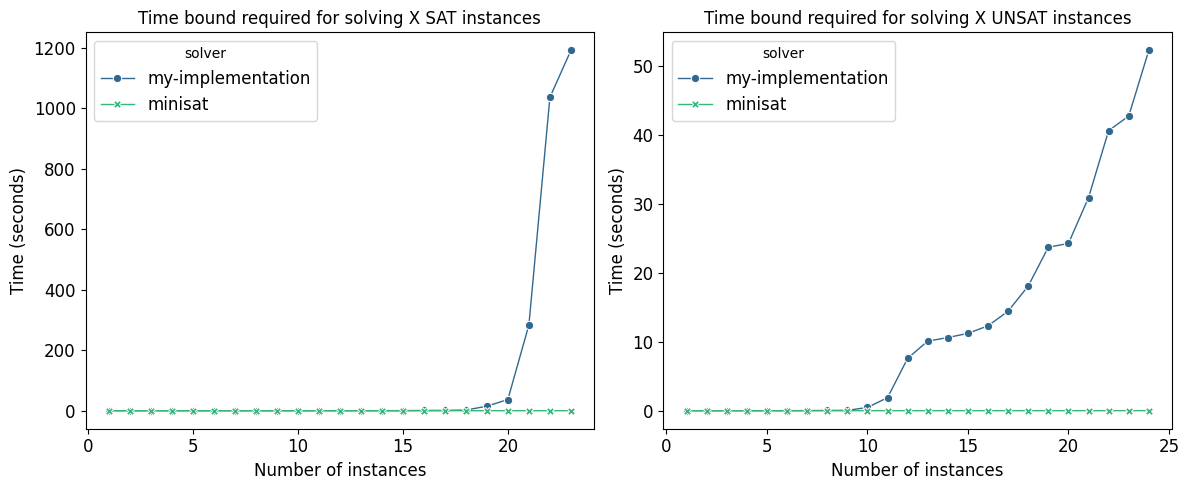

<Figure size 1200x600 with 0 Axes>

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(ax=axes[0],data=sat_data,y='time',x='n_solved',
             hue='solver',style='solver',
             markers=True, dashes=False, palette='viridis')
axes[0].set(title="Time bound required for solving X SAT instances",
       ylabel="Time (seconds)", xlabel="Number of instances")
axes[0].ticklabel_format(style='plain', axis='y')

sns.lineplot(ax=axes[1],data=unsat_data,y='time',x='n_solved',
             hue='solver',style='solver',
             markers=True, dashes=False, palette='viridis')
axes[1].set(title="Time bound required for solving X UNSAT instances",
       ylabel="Time (seconds)", xlabel="Number of instances")

plt.tight_layout()
plt.show()

plt.savefig('results.eps', format='eps')